## 3. L'analyse en composantes principales selon la catégorie socioprofessionnelle

In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns

### 3. 1. L'importation du jeu de données

In [ ]:
data_communes = pd.read_excel(".../Inegalites2018_IDFCommunes.xlsx")

In [ ]:
data_communes

,Code géographique,Région,Département,Latitude,Longitude,Libellé géographique,Médiane (€),Part Pop 15 ans ou plus non scol. Sans diplôme ou CEP,"Part Pop 15 ans ou plus non scol. BEPC, brevet des collèges, DNB",Part Pop 15 ans ou plus non scol. CAP-BEP ou équiv.,...,Part Pop 15 ans ou plus Enseignement sup,Taux d'emploi 15-64 ans,Taux de chômage 15-64 ans,Part Actifs 15-64 ans Agriculteurs exploitants,"Part Actifs 15-64 ans Artisans, Comm., Chefs entr.","Part Actifs 15-64 ans Cadres, Prof. intel. sup.",Part Actifs 15-64 ans Prof. intermédiaires,Part Actifs 15-64 ans Employés,Part Actifs 15-64 ans Ouvriers,Taux d'immigration
0,75101,11,75,"48,86263049","2,336293447",Paris 1er Arrondissement,38020,0.099,0.031,0.075,...,0.681,0.704,0.106,0.000,0.093,0.511,0.198,0.153,0.044,0.190
1,75102,11,75,"48,86790338","2,344107167",Paris 2e Arrondissement,35710,0.084,0.023,0.064,...,0.717,0.768,0.098,0.000,0.079,0.538,0.198,0.134,0.050,0.184
2,75103,11,75,"48,86305413","2,359361059",Paris 3e Arrondissement,36450,0.085,0.028,0.047,...,0.721,0.741,0.100,0.000,0.081,0.526,0.220,0.139,0.035,0.201
3,75104,11,75,"48,85422828","2,357361938",Paris 4e Arrondissement,34940,0.075,0.030,0.062,...,0.705,0.706,0.111,0.001,0.077,0.509,0.221,0.156,0.037,0.192
4,75105,11,75,"48,84450866","2,349859386",Paris 5e Arrondissement,37480,0.074,0.025,0.053,...,0.743,0.650,0.091,0.000,0.064,0.574,0.196,0.130,0.035,0.161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1266,95676,11,95,"49,08589993","1,730396299",Villers-en-Arthies,27880,0.089,0.077,0.283,...,0.343,0.753,0.091,0.000,0.077,0.128,0.308,0.359,0.128,0.022
1267,95678,11,95,"49,07028882","2,239508719",Villiers-Adam,31760,0.153,0.053,0.218,...,0.422,0.709,0.085,0.000,0.059,0.329,0.282,0.189,0.141,0.046
1268,95680,11,95,"49,00844942","2,40385604",Villiers-le-Bel,13040,0.344,0.068,0.204,...,0.191,0.555,0.207,0.000,0.050,0.068,0.219,0.384,0.279,0.360
1269,95682,11,95,"49,07430887","2,3868896",Villiers-le-Sec,26220,0.113,0.083,0.211,...,0.414,0.810,0.075,0.000,0.042,0.208,0.250,0.375,0.125,0.122


In [ ]:
#Copier le DataSet
communes_socioeco = data_communes.copy()

#Accéder aux colonnes du DataSet
communes_socioeco.columns

Index(['Code géographique', 'Région', 'Département', 'Latitude', 'Longitude',
       'Libellé géographique', 'Médiane (€)',
       'Part Pop 15 ans ou plus non scol. Sans diplôme ou CEP ',
       'Part Pop 15 ans ou plus non scol. BEPC, brevet des collèges, DNB ',
       'Part Pop 15 ans ou plus non scol. CAP-BEP ou équiv. ',
       'Part Pop 15 ans ou plus non scol. Bac, brevet pro. ou équiv. ',
       'Part Pop 15 ans ou plus Enseignement sup', 'Taux d'emploi 15-64 ans',
       'Taux de chômage 15-64 ans',
       'Part Actifs 15-64 ans Agriculteurs exploitants  ',
       'Part Actifs 15-64 ans Artisans, Comm., Chefs entr.  ',
       'Part Actifs 15-64 ans Cadres, Prof. intel. sup.  ',
       'Part Actifs 15-64 ans Prof. intermédiaires  ',
       'Part Actifs 15-64 ans Employés  ', 'Part Actifs 15-64 ans Ouvriers  ',
       'Taux d'immigration'],
      dtype='object')

### 2.2. L'ACP selon la catégorie socioprofessionnelle

In [ ]:
#Supprimer les colonnes qui ne sont pas nécessaires dans mon étude

communes_csp = data_communes[['Part Actifs 15-64 ans Agriculteurs exploitants  ',
       'Part Actifs 15-64 ans Artisans, Comm., Chefs entr.  ',
       'Part Actifs 15-64 ans Cadres, Prof. intel. sup.  ',
       'Part Actifs 15-64 ans Prof. intermédiaires  ',
       'Part Actifs 15-64 ans Employés  ', 'Part Actifs 15-64 ans Ouvriers  ']]
communes_csp['Code géographique'] = data_communes['Code géographique'].astype(str)
communes_csp = communes_csp.set_index('Code géographique')
communes_csp

C:\Users\almou\AppData\Local\Temp/ipykernel_804/2681805457.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  communes_csp['Code géographique'] = data_communes['Code géographique'].astype(str)


,Part Actifs 15-64 ans Agriculteurs exploitants,"Part Actifs 15-64 ans Artisans, Comm., Chefs entr.","Part Actifs 15-64 ans Cadres, Prof. intel. sup.",Part Actifs 15-64 ans Prof. intermédiaires,Part Actifs 15-64 ans Employés,Part Actifs 15-64 ans Ouvriers
Code géographique,,,,,,
75101,0.000,0.093,0.511,0.198,0.153,0.044
75102,0.000,0.079,0.538,0.198,0.134,0.050
75103,0.000,0.081,0.526,0.220,0.139,0.035
75104,0.001,0.077,0.509,0.221,0.156,0.037
75105,0.000,0.064,0.574,0.196,0.130,0.035
...,...,...,...,...,...,...
95676,0.000,0.077,0.128,0.308,0.359,0.128
95678,0.000,0.059,0.329,0.282,0.189,0.141
95680,0.000,0.050,0.068,0.219,0.384,0.279


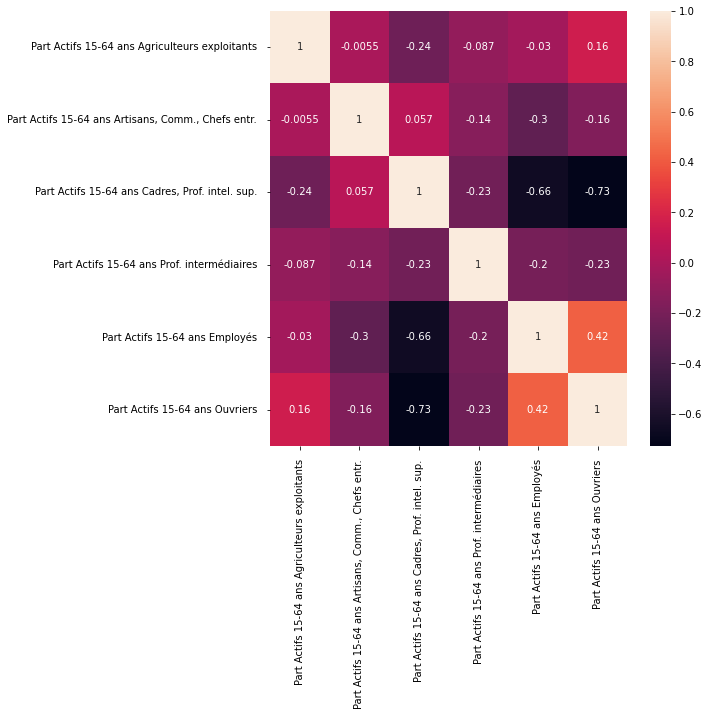

In [ ]:
#Matrice de corrélations
corr_csp = communes_csp.corr(method='pearson')

plt.figure(figsize=(8,8))
sns.heatmap(corr_csp, annot=True)
plt.show()

In [ ]:
#Résumer les données
communes_csp.describe()

,Part Actifs 15-64 ans Agriculteurs exploitants,"Part Actifs 15-64 ans Artisans, Comm., Chefs entr.","Part Actifs 15-64 ans Cadres, Prof. intel. sup.",Part Actifs 15-64 ans Prof. intermédiaires,Part Actifs 15-64 ans Employés,Part Actifs 15-64 ans Ouvriers
count,1271.000000,1271.000000,1271.000000,1271.000000,1271.000000,1271.000000
mean,0.009984,0.065446,0.223908,0.292685,0.255790,0.152197
std,0.025945,0.037608,0.124742,0.068310,0.075395,0.076627
min,0.000000,0.000000,0.000000,0.050000,0.000000,0.000000
25%,0.000000,0.042000,0.135000,0.252000,0.206000,0.096000
50%,0.000000,0.058000,0.202000,0.291000,0.256000,0.143000
75%,0.006500,0.083000,0.292000,0.331000,0.304500,0.200000
max,0.250000,0.283000,0.667000,0.577000,0.545000,0.503000


In [ ]:
#Dimensions du Dataset (nombre d'individus et nombre de variables)
n = communes_csp.shape[0]
p = communes_csp.shape[1]

### 3. La pratique de la normalisation

In [ ]:
s_scaler = StandardScaler()
scaled_csp = s_scaler.fit_transform(communes_csp)
scaled_csp = pd.DataFrame(scaled_csp)
scaled_csp.columns = ['Part Actifs 15-64 ans Agriculteurs exploitants  ',
       'Part Actifs 15-64 ans Artisans, Comm., Chefs entr.  ',
       'Part Actifs 15-64 ans Cadres, Prof. intel. sup.  ',
       'Part Actifs 15-64 ans Prof. intermédiaires  ',
       'Part Actifs 15-64 ans Employés  ', 'Part Actifs 15-64 ans Ouvriers  ']
scaled_csp.set_index(data_communes['Code géographique'])

,Part Actifs 15-64 ans Agriculteurs exploitants,"Part Actifs 15-64 ans Artisans, Comm., Chefs entr.","Part Actifs 15-64 ans Cadres, Prof. intel. sup.",Part Actifs 15-64 ans Prof. intermédiaires,Part Actifs 15-64 ans Employés,Part Actifs 15-64 ans Ouvriers
Code géographique,,,,,,
75101,-0.384972,0.732940,2.302397,-1.386653,-1.363886,-1.412546
75102,-0.384972,0.360537,2.518929,-1.386653,-1.615991,-1.334213
75103,-0.384972,0.413737,2.422693,-1.064463,-1.549647,-1.530044
75104,-0.346414,0.307336,2.286357,-1.049818,-1.324080,-1.503933
75105,-0.384972,-0.038467,2.807639,-1.415943,-1.669065,-1.530044
...,...,...,...,...,...,...
95676,-0.384972,0.307336,-0.769155,0.224295,1.369460,-0.315896
95678,-0.384972,-0.171468,0.842808,-0.156474,-0.886214,-0.146177
95680,-0.384972,-0.410870,-1.250338,-1.079108,1.701177,1.655461


In [ ]:
#Vériifier si les données sont bien centrées-réduites
print(np.mean(scaled_csp,axis=0))
print(np.std(scaled_csp,axis=0,ddof=0))

Part Actifs 15-64 ans Agriculteurs exploitants         -1.834969e-15
Part Actifs 15-64 ans Artisans, Comm., Chefs entr.      2.665933e-16
Part Actifs 15-64 ans Cadres, Prof. intel. sup.         2.234859e-16
Part Actifs 15-64 ans Prof. intermédiaires             -3.757812e-16
Part Actifs 15-64 ans Employés                         -4.535230e-16
Part Actifs 15-64 ans Ouvriers                         -1.458751e-16
dtype: float64
Part Actifs 15-64 ans Agriculteurs exploitants          1.0
Part Actifs 15-64 ans Artisans, Comm., Chefs entr.      1.0
Part Actifs 15-64 ans Cadres, Prof. intel. sup.         1.0
Part Actifs 15-64 ans Prof. intermédiaires              1.0
Part Actifs 15-64 ans Employés                          1.0
Part Actifs 15-64 ans Ouvriers                          1.0
dtype: float64


### 2.4. Calcul des valeurs propres et des composants

In [ ]:
#Coordonnées des communes dans les nouveaux axes
pca = PCA()
coords_csp = pca.fit_transform(scaled_csp)
coords_csp

array([[ 2.97957672e+00,  1.42839524e+00, -8.41405150e-01,
         3.71302278e-01,  2.57782422e-02, -5.41712957e-03],
       [ 3.11982954e+00,  1.30120928e+00, -9.44908051e-01,
         7.15305605e-01,  3.26385874e-01, -5.42222804e-03],
       [ 3.16718932e+00,  1.02397680e+00, -7.75947886e-01,
         6.04787841e-01,  1.29745305e-01,  5.47963806e-03],
       ...,
       [-2.63115317e+00,  5.85595393e-01, -1.12200852e+00,
        -3.71889315e-01,  1.27667888e-01,  5.14474914e-05],
       [-8.14086509e-01, -7.79332796e-02, -1.30196162e+00,
         2.09189005e-01, -1.07915249e+00,  6.22561138e-04],
       [ 1.98372913e+00, -9.45384136e-01,  1.73318117e+00,
        -1.05723438e+00,  1.25882423e+00,  4.44735379e-03]])

In [ ]:
#Déterminer les valeurs propres
eigenvalues = (n-1)/n*pca.explained_variance_
print("Valeurs propres de l'ACP = ", eigenvalues)

Valeurs propres de l'ACP =  [2.31950637e+00 1.20001064e+00 1.05906916e+00 8.98494417e-01
 5.22905936e-01 1.34790706e-05]


In [ ]:
#Le taux d'inertie des 6 axes
print("Taux d'inertie des 6 axes = ", pca.explained_variance_ratio_)

Taux d'inertie des 6 axes =  [3.86584395e-01 2.00001774e-01 1.76511526e-01 1.49749070e-01
 8.71509893e-02 2.24651176e-06]


Text(0.5, 1.0, 'Les valeurs propres en fonction des facteurs')

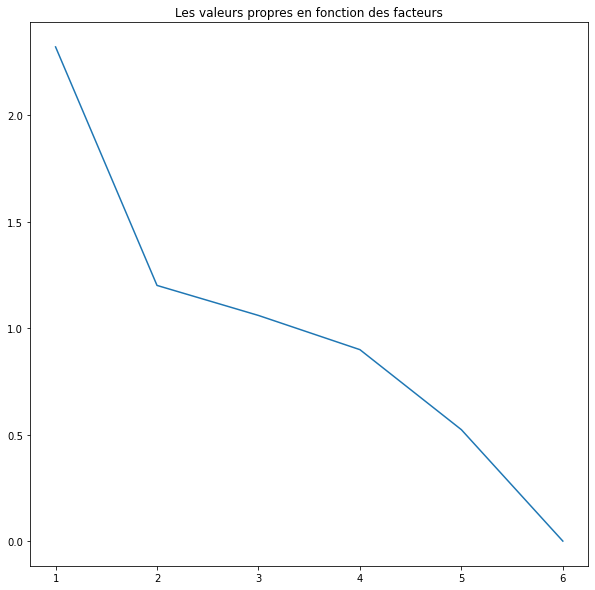

In [ ]:
fig, axes = plt.subplots(figsize=(10,10))
axes.set_xticks(np.arange(p+1))
axes.plot(range(1,p+1), eigenvalues)
plt.title("Les valeurs propres en fonction des facteurs")

Text(0.5, 1.0, 'Cumul de la variance expliquée en fonction des facteurs')

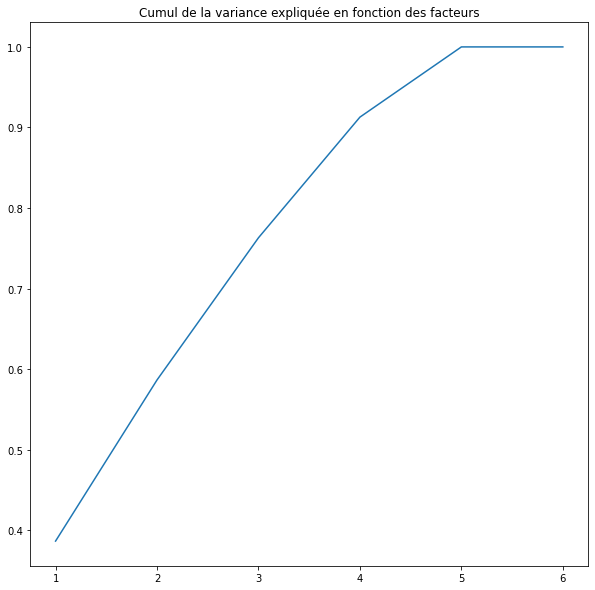

In [ ]:
#Courbe de la variance cumulée en fonction du nombre des facteurs
fig, axes = plt.subplots(figsize=(10,10))
axes.set_xticks(np.arange(p+1))
axes.plot(range(1,p+1), np.cumsum(pca.explained_variance_ratio_))
plt.title("Cumul de la variance expliquée en fonction des facteurs")

Text(0, 0.5, "Axe 2 : 20 % de l'inertie totale")

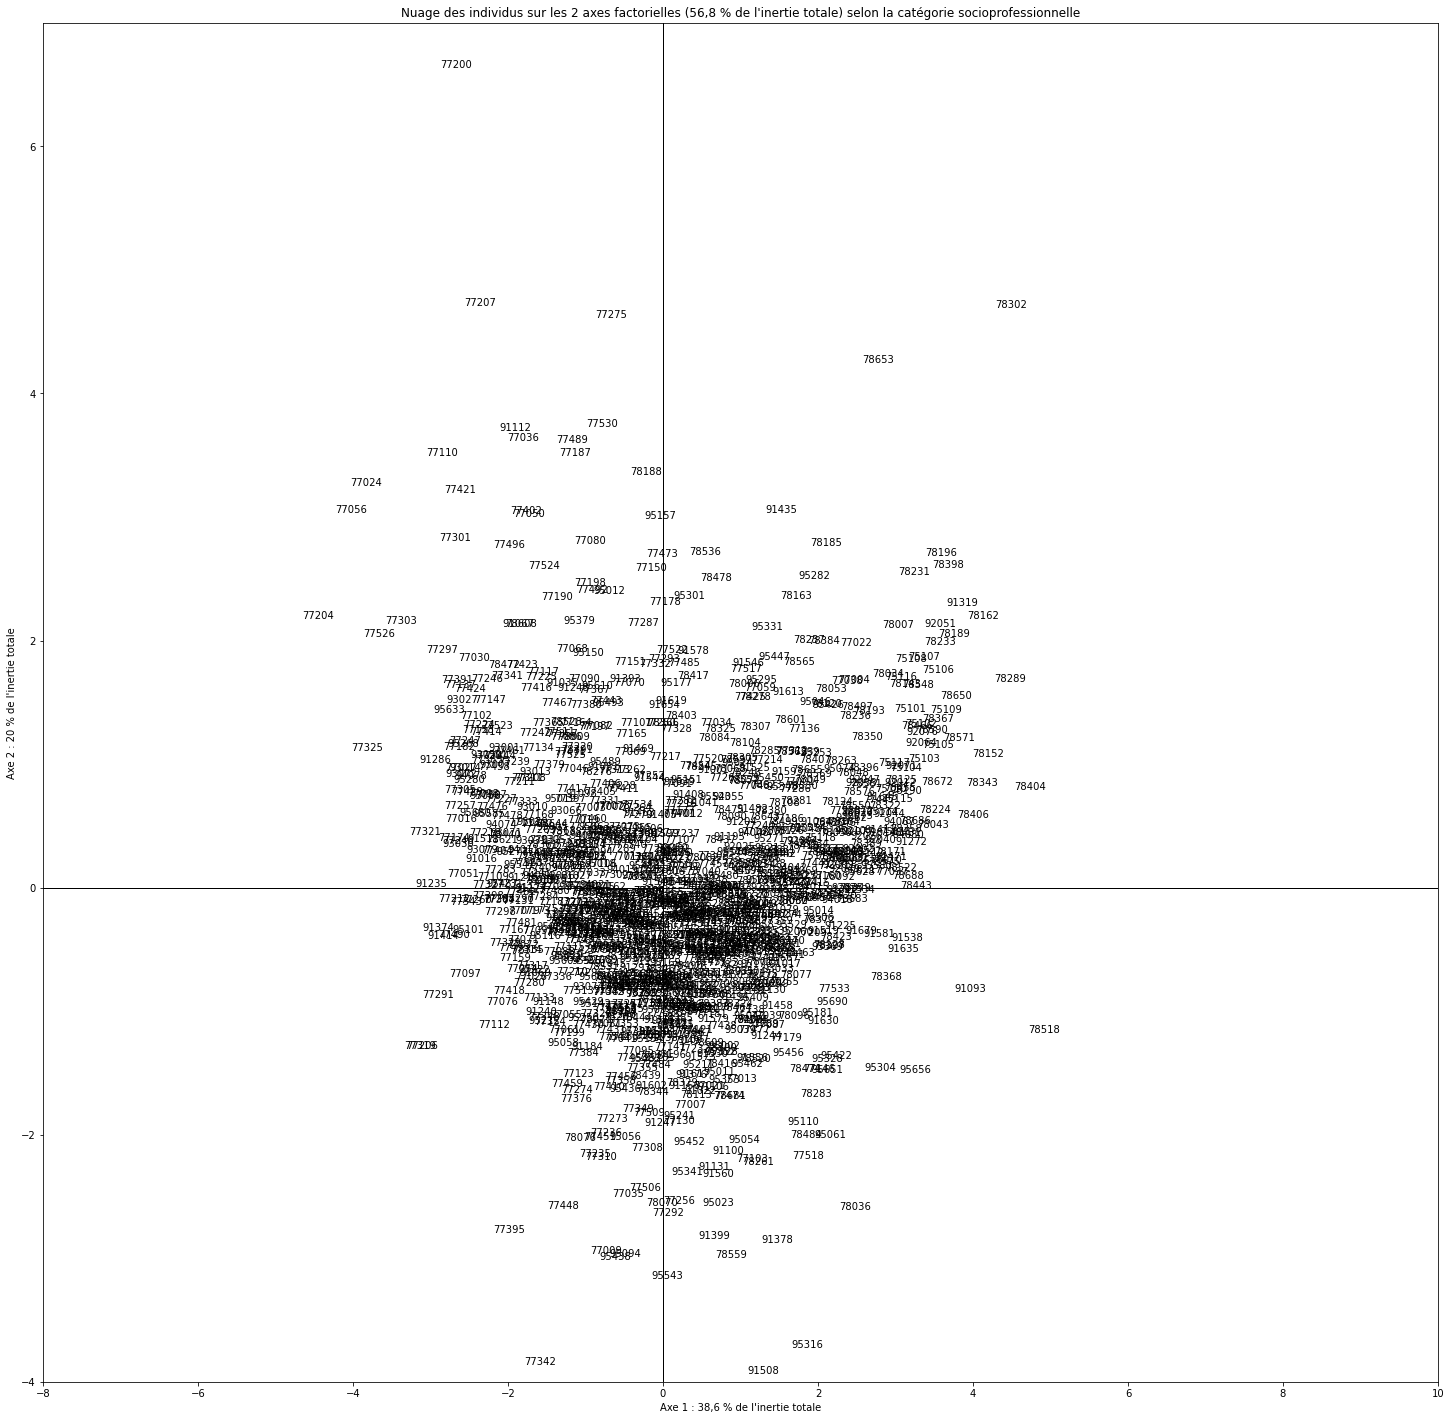

In [ ]:
#Représentation des individus
fig, axes = plt.subplots(figsize=(25,25))
axes.set_xlim(-8,10)
axes.set_ylim(-4,7)
plt.plot([-8,10],[0,0],color='black',linewidth=1)
plt.plot([0,0],[-4,10],color='black',linewidth=1)

for i in range(n):
    plt.annotate(communes_csp.index[i],(coords_csp[i,0],coords_csp[i,1]))
plt.title("Nuage des individus sur les 2 axes factorielles (56,8 % de l'inertie totale) selon la catégorie socioprofessionnelle")
plt.xlabel("Axe 1 : 38,6 % de l'inertie totale")
plt.ylabel("Axe 2 : 20 % de l'inertie totale")

In [ ]:
#Qualité de représentation des individus
total_dist = np.sum(scaled_csp**2,axis=1)
cos2_csp = coords_csp**2
for j in range(p):
    cos2_csp[:,j]=cos2_csp[:,j]/total_dist
    
    
pd.DataFrame({'Code géographique':communes_csp.index,'COS2_1':cos2_csp[:,0],'COS2_2':cos2_csp[:,1]})

,Code géographique,COS2_1,COS2_2
0,75101,0.754619,0.173427
1,75102,0.752332,0.130871
2,75103,0.831466,0.086911
3,75104,0.811205,0.085595
4,75105,0.736503,0.085213
...,...,...,...
1266,95676,0.257493,0.046107
1267,95678,0.654632,0.000903
1268,95680,0.797633,0.039510
1269,95682,0.185524,0.001700


In [ ]:
#Contribution des individus
ctr = coords_csp**2
for j in range(p):
    ctr[:,j]=ctr[:,j]/(n*eigenvalues[j])
    
pd.DataFrame({'Code géographique':communes_csp.index,'CTR_1':ctr[:,0],'CTR_2':ctr[:,1]})


,Code géographique,CTR_1,CTR_2
0,75101,0.003011,0.001338
1,75102,0.003302,0.001110
2,75103,0.003403,0.000687
3,75104,0.002905,0.000593
4,75105,0.003788,0.000847
...,...,...,...
1266,95676,0.000250,0.000086
1267,95678,0.000382,0.000001
1268,95680,0.002348,0.000225
1269,95682,0.000225,0.000004


In [ ]:
#Cercle de corrélations des variables
sqrt_eigenvalues = np.sqrt(eigenvalues)
corvar_csp = np.zeros((p,p))
for i in range(p):
    corvar_csp[:,i]=pca.components_[i,:]*sqrt_eigenvalues[i]
    
pd.DataFrame({'Niveau de formation':communes_csp.columns,'COR_1':corvar_csp[:,0],'COR_2':corvar_csp[:,1]})

,Niveau de formation,COR_1,COR_2
0,Part Actifs 15-64 ans Agriculteurs exploitants,-0.249051,0.347233
1,"Part Actifs 15-64 ans Artisans, Comm., Chefs e...",0.314204,0.529773
2,"Part Actifs 15-64 ans Cadres, Prof. intel. sup.",0.900949,0.145320
3,Part Actifs 15-64 ans Prof. intermédiaires,0.096378,-0.858802
4,Part Actifs 15-64 ans Employés,-0.797793,-0.044413
5,Part Actifs 15-64 ans Ouvriers,-0.837427,0.195321


Text(0.5, 1.0, "Cercle des corrélations : 58,0% de l'inertie totale")

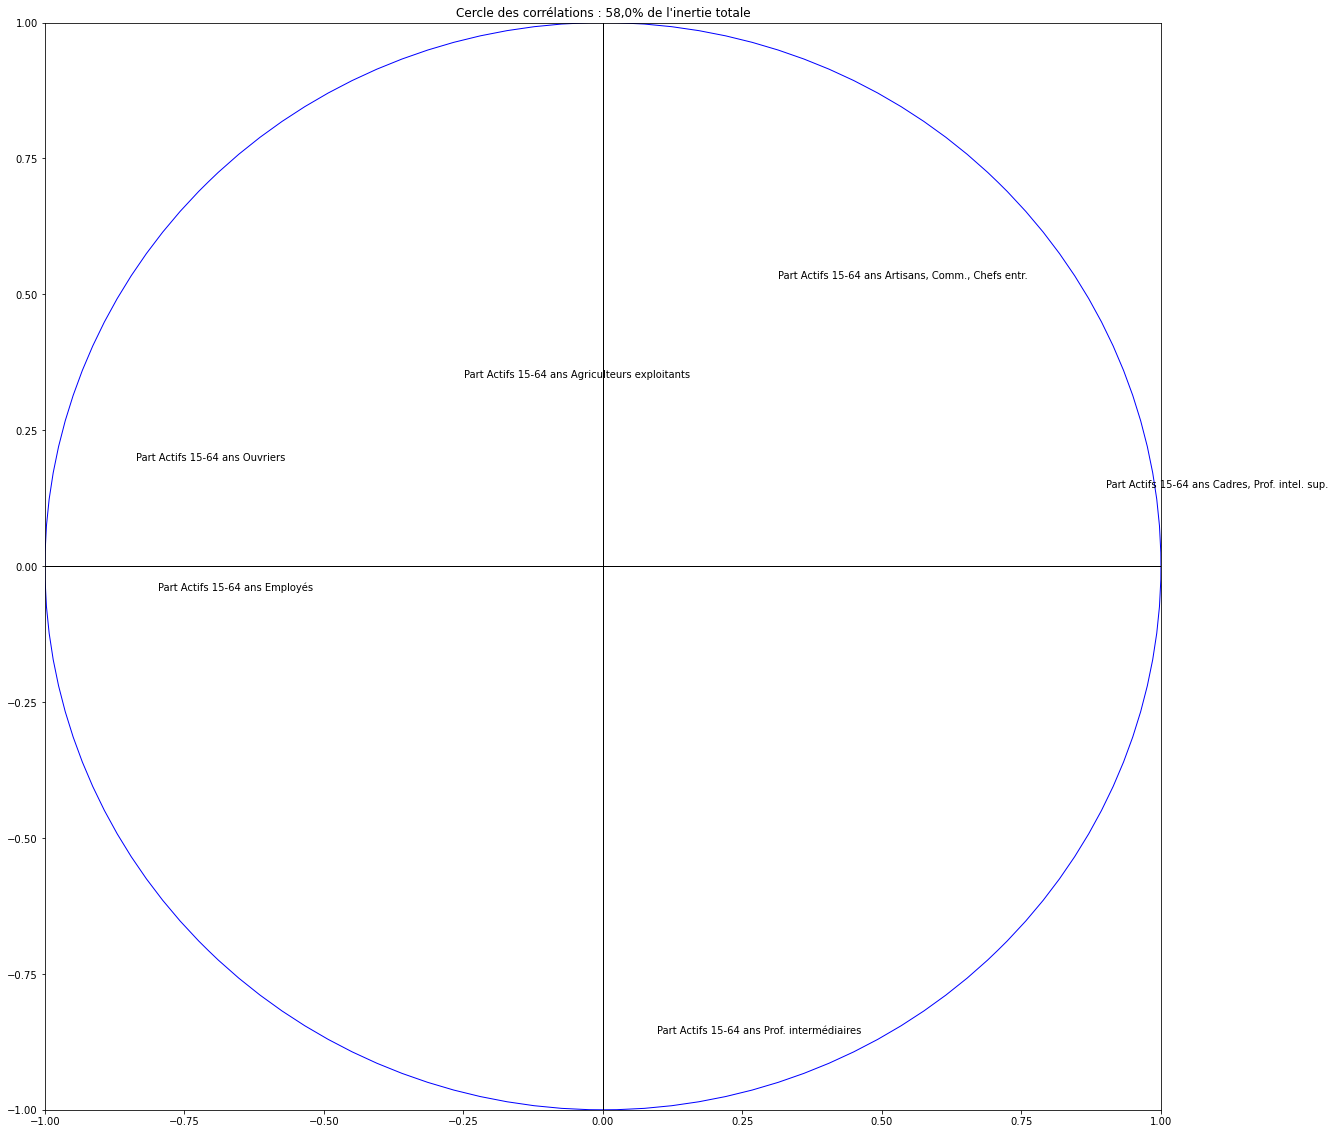

In [ ]:
#Tracer le cercle des corrélations des variables d'instruction
fig, axes = plt.subplots(figsize=(20,20))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)

for j in range(p):
    plt.annotate(communes_csp.columns[j],(corvar_csp[j,0],corvar_csp[j,1]))
    
plt.plot([-1,1],[0,0],color='black',linewidth=1)
plt.plot([0,0],[-1,1],color='black',linewidth=1)

circle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(circle)
plt.title("Cercle des corrélations : 58,0% de l'inertie totale")


In [ ]:
#Qualité de représentation des variables
cos2_var_csp = corvar_csp**2
pd.DataFrame({'Catégorie socioprofessionnelle':communes_csp.columns,'COS2_1':cos2_var_csp[:,0],'COS2_2':cos2_var_csp[:,1]})

,Catégorie socioprofessionnelle,COS2_1,COS2_2
0,Part Actifs 15-64 ans Agriculteurs exploitants,0.062027,0.120571
1,"Part Actifs 15-64 ans Artisans, Comm., Chefs e...",0.098724,0.280659
2,"Part Actifs 15-64 ans Cadres, Prof. intel. sup.",0.811709,0.021118
3,Part Actifs 15-64 ans Prof. intermédiaires,0.009289,0.737540
4,Part Actifs 15-64 ans Employés,0.636474,0.001973
5,Part Actifs 15-64 ans Ouvriers,0.701284,0.038150


In [ ]:
#Contribution des variables
ctr_var_csp=cos2_var_csp
for i in range(p):
    ctr_var_csp[:,i]=ctr_var_csp[:,i]/eigenvalues[i]
pd.DataFrame({'CSP':communes_csp.columns,'CTR_1':ctr_var_csp[:,0],'CTR_2':ctr_var_csp[:,1]})

,CSP,CTR_1,CTR_2
0,Part Actifs 15-64 ans Agriculteurs exploitants,0.026741,0.100475
1,"Part Actifs 15-64 ans Artisans, Comm., Chefs e...",0.042563,0.233880
2,"Part Actifs 15-64 ans Cadres, Prof. intel. sup.",0.349949,0.017598
3,Part Actifs 15-64 ans Prof. intermédiaires,0.004005,0.614612
4,Part Actifs 15-64 ans Employés,0.274401,0.001644
5,Part Actifs 15-64 ans Ouvriers,0.302342,0.031792


Dans l'axe 1, les variables qui contribuent le plus sont : **les cadres, employés et ouvriers*.
Dans l'axe 2, **la part des professions intermédiaires 15-64 ans contribuent à 61,5% de l'inertie de la 2ème composante** tandis que la part des artisans contribuent à **23,3% de l'inertie de l'axe 2**.

## 3. La méthode de classification

### 3.1. Les librairies nécessaires

In [ ]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import KMeans

### 3.2. La classification hiérarchique ascendante selon le niveau d'éducation de la population d'Ile-de-France

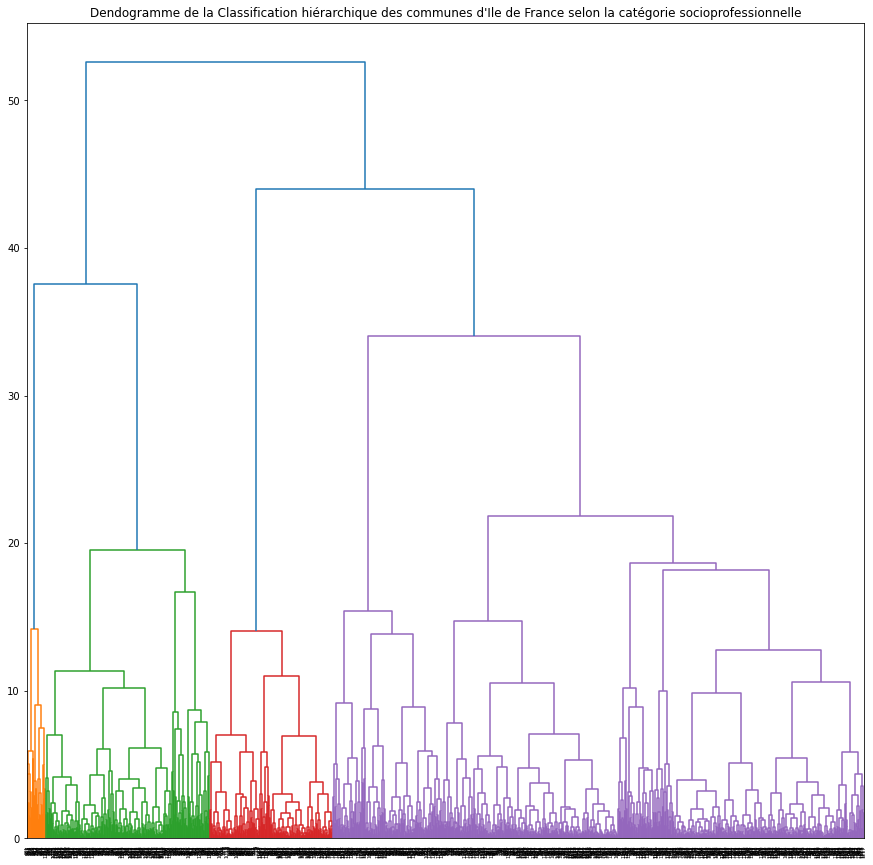

No handles with labels found to put in legend.


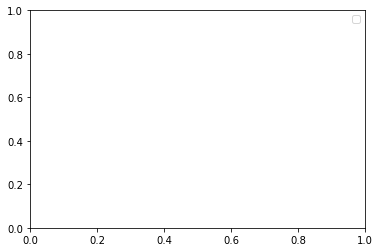

In [ ]:
#Mise en place de la classification hiérarchique ascendante par 4 catégories en conservant 58% de l'inertie totale via l'ACP
Z = sch.linkage(communes_csp.iloc[:,0:6],method='ward',metric='euclidean')

#Afficher le dendrogramme
plt.figure(figsize=(15,15))
plt.title("Dendogramme de la Classification hiérarchique des communes d'Ile de France selon la catégorie socioprofessionnelle")
dendrogram = sch.dendrogram(sch.linkage(coords_csp, method  = "ward"))
plt.show()

### 3.3. Nuage des individus selon le niveau d'éducation et leurs groupes respectifs à travers les axes de l'ACP

Text(0.5, 1.0, 'K-Means par la méthode du PCA')

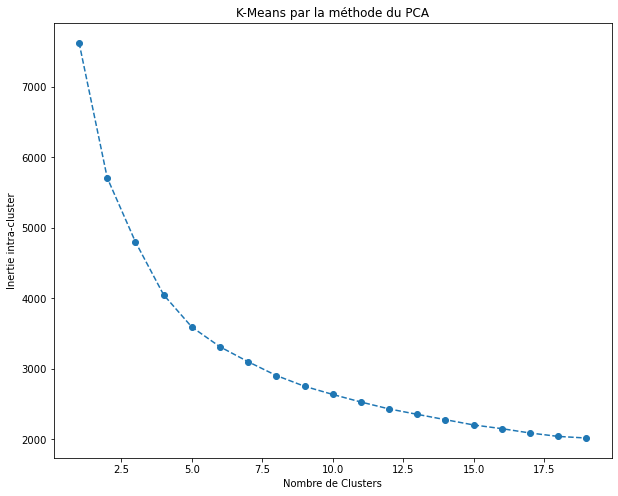

In [ ]:
#Courbe de l'inertie intra-cluster pour le K-Means
inertie_intra = []
for i in range(1,20):
    kmeans_pca = KMeans(n_clusters = i, init='k-means++',random_state=42)
    kmeans_pca.fit(coords_csp)
    inertie_intra.append(kmeans_pca.inertia_)
    
plt.figure(figsize=(10,8))
plt.plot(range(1,20),inertie_intra, marker='o',linestyle='--')
plt.xlabel('Nombre de Clusters')
plt.ylabel('Inertie intra-cluster')
plt.title('K-Means par la méthode du PCA')

In [ ]:
#Nuage des individus avec les 2 strates dans les nouveaux axes de l'ACP
kmeans_pca_csp = KMeans(n_clusters=4,init='k-means++',random_state=42)
kmeans_pca_csp.fit(coords_csp)

KMeans(n_clusters=4, random_state=42)

In [ ]:
#Créer les nouvelles colonnes dans le DataFrame
csp_pca_kmeans = pd.concat([communes_csp.reset_index(drop=True),pd.DataFrame(coords_csp[:,0:2])], axis=1)
csp_pca_kmeans.columns.values[-2:]=['Composant 1','Composant 2']
csp_pca_kmeans['Numéro de cluster']=kmeans_pca_csp.labels_
csp_pca_kmeans

,Part Actifs 15-64 ans Agriculteurs exploitants,"Part Actifs 15-64 ans Artisans, Comm., Chefs entr.","Part Actifs 15-64 ans Cadres, Prof. intel. sup.",Part Actifs 15-64 ans Prof. intermédiaires,Part Actifs 15-64 ans Employés,Part Actifs 15-64 ans Ouvriers,Composant 1,Composant 2,Numéro de cluster
0,0.000,0.093,0.511,0.198,0.153,0.044,2.979577,1.428395,1
1,0.000,0.079,0.538,0.198,0.134,0.050,3.119830,1.301209,1
2,0.000,0.081,0.526,0.220,0.139,0.035,3.167189,1.023977,1
3,0.001,0.077,0.509,0.221,0.156,0.037,2.926692,0.950685,1
4,0.000,0.064,0.574,0.196,0.130,0.035,3.341930,1.136743,1
...,...,...,...,...,...,...,...,...,...
1266,0.000,0.077,0.128,0.308,0.359,0.128,-0.858122,-0.363119,0
1267,0.000,0.059,0.329,0.282,0.189,0.141,1.060856,0.039392,1
1268,0.000,0.050,0.068,0.219,0.384,0.279,-2.631153,0.585595,0
1269,0.000,0.042,0.208,0.250,0.375,0.125,-0.814087,-0.077933,0


C:\Users\almou\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


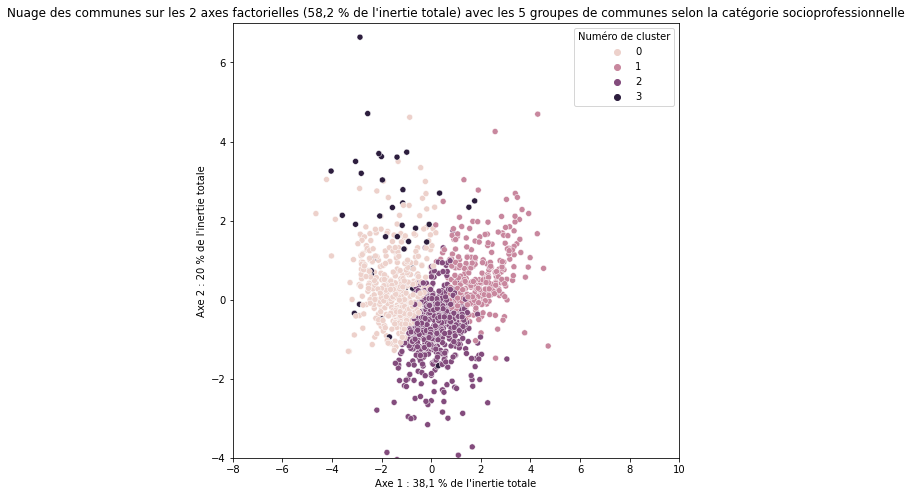

In [ ]:
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-8,10)
axes.set_ylim(-4,7)
sns.scatterplot(coords_csp[:,0],coords_csp[:,1], hue = csp_pca_kmeans['Numéro de cluster'])
plt.title("Nuage des communes sur les 2 axes factorielles (58,2 % de l'inertie totale) avec les 5 groupes de communes selon la catégorie socioprofessionnelle")
plt.xlabel("Axe 1 : 38,1 % de l'inertie totale")
plt.ylabel("Axe 2 : 20 % de l'inertie totale")
plt.show()